A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then, it started witnessing a decline in viewership. The company wants to figure out what went wrong.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
from sklearn.preprocessing import StandardScaler
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
media = pd.read_csv("mediacompany.csv")

### Inspecting the data

In [3]:
 media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
media.shape

(80, 8)

In [5]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000,0.0
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000,NaN
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177,NaN
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000,NaN
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000,NaN
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000,NaN
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000,NaN
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000,NaN


### Adding new variables

In [6]:
#### adding new variables
weekend_mapping = {0:0,1:0, 2:0, 3:0,4:0, 5:0, 6:1, 7:1 }
StartDate = date(2017,3,1)
media["Date"] = pd.to_datetime(media["Date"]).dt.date
media["weekday"] = pd.to_datetime(media["Date"]).dt.weekday
media["weekend"] = pd.to_datetime(media["Date"]).dt.weekday.map(weekend_mapping)
media["days_diff"] = (media["Date"] - StartDate).dt.days

In [7]:
# Create lag variable
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media.Lag_Views.replace(108961,0, inplace=True)

### Missing Values:

In [8]:
media.isnull().sum()

Date                    0
Views_show              0
Visitors                0
Views_platform          0
Ad_impression           0
Cricket_match_india     0
Character_A             0
Unnamed: 7             80
weekday                 0
weekend                 0
days_diff               0
Lag_Views               0
dtype: int64

There are 80 rows in the dataset, and all the rows have NA values.
So dropping the same.

In [9]:
media.drop("Unnamed: 7", axis = 1, inplace = True)

### Exploratory Data Analysis

##### checking to see if there is a drop in the number of visitors over the time period

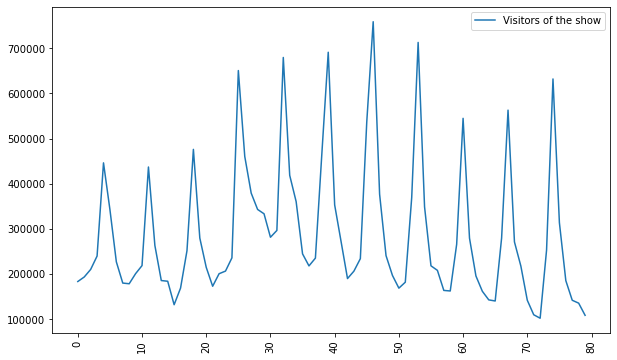

In [10]:
plt.figure(figsize=(10,6))
plt.plot(media["days_diff"], media["Views_show"], label = "Visitors of the show")
plt.xticks(rotation = 90)
plt.legend(loc = "best")
plt.show()

Avg viewership at the beginning of the show was less. 
During the mid-april the viewership of the show has increased. 
And the trend appears to slowly decrease.

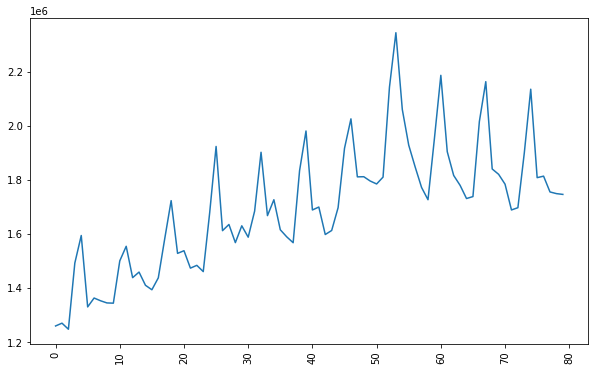

In [11]:
plt.figure(figsize=(10,6))
plt.plot(media["days_diff"], media["Visitors"])
plt.xticks(rotation = 90)
plt.show()

Overall visitors to the platform seems to increase over the time period.
There was one peak observed during april last week.

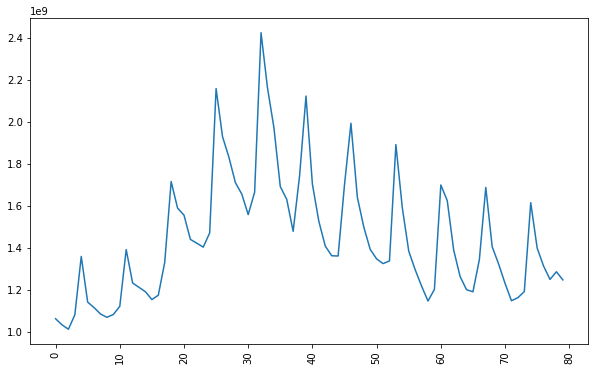

In [12]:
plt.figure(figsize=(10,6))
plt.plot(media["days_diff"], media["Ad_impression"])
plt.xticks(rotation = 90)
plt.show()

From here, we could see that the Ad impressions over the time has reduced.

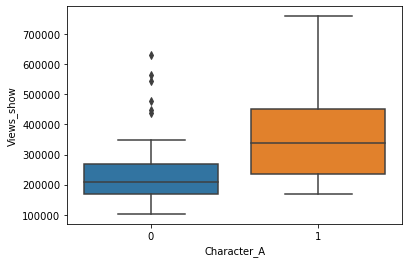

In [13]:
sns.boxplot(media["Character_A"], media["Views_show"])
plt.show()

Lesser views were observed when Character A is not present in the show.

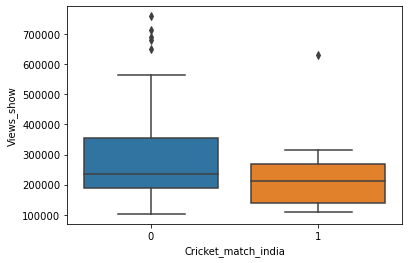

In [14]:
sns.boxplot(media["Cricket_match_india"], media["Views_show"])
plt.show()

Number of views during Cricket Match have seemed to be dropped significantly 

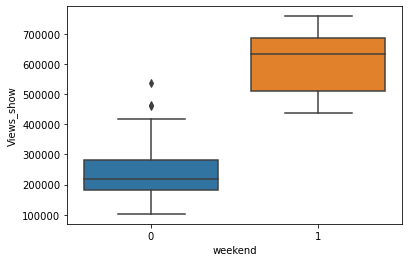

In [15]:
sns.boxplot(media["weekend"], media["Views_show"])
plt.show()

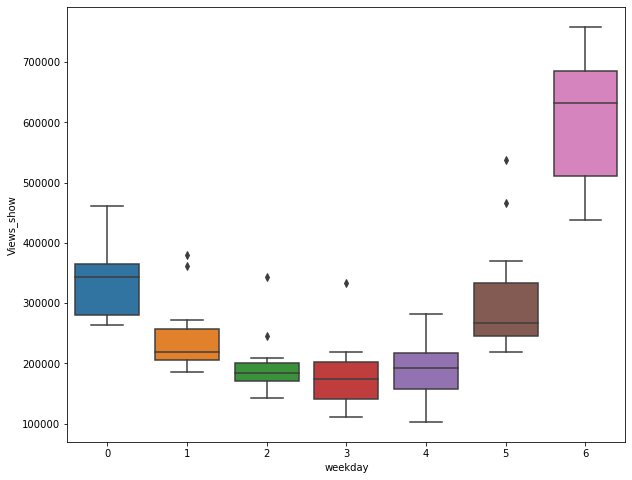

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(media["weekday"], media["Views_show"])
plt.show()

### Rescaling the variables

In [17]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,weekday,weekend,days_diff,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0,1,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0,2,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,0,3,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,1,4,240061


In [18]:
scaler = StandardScaler()
media[["Views_show", "Visitors", "Views_platform", "Ad_impression", "Lag_Views"]] = scaler.fit_transform(media[["Views_show", "Visitors", "Views_platform", "Ad_impression", "Lag_Views"]])

In [19]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,weekday,weekend,days_diff,Lag_Views
0,2017-03-01,-0.689591,-1.910417,-1.781967,-1.286948,0,0,2,0,0,-1.849431
1,2017-03-02,-0.624474,-1.865434,-1.836370,-1.384819,0,0,3,0,1,-0.671743
2,2017-03-03,-0.515895,-1.962854,-1.713997,-1.455587,0,0,4,0,2,-0.607487
3,2017-03-04,-0.323746,-0.897457,-1.267762,-1.225102,1,0,5,0,3,-0.500344
4,2017-03-05,1.015968,-0.454290,-0.625104,-0.285503,0,0,6,1,4,-0.310735


### Building Model

In [20]:
X = pd.DataFrame(media["Visitors"])
y = media["Views_show"]

X = sm.add_constant(X)

In [21]:
X.shape, y.shape

((80, 2), (80,))

In [22]:
lr = OLS(y, X)
lr_model= lr.fit()

In [23]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     31.33
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           3.12e-07
Time:                        09:38:04   Log-Likelihood:                -100.01
No. Observations:                  80   AIC:                             204.0
Df Residuals:                      78   BIC:                             208.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.388e-17      0.096  -1.45e-16      1.000      -0.190       0.190
Visitors       0.5353      0.096      5.597      0.000       0.345       0.726
==============================================================================
Omnibus:                        4.922   Durbin-Watson:                   0.894
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.906
Skew:                           0.598   Prob(JB):                       0.0860
Kurtosis:                       2.801   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
X = pd.DataFrame(media[["Visitors", "Character_A"]])
y = media["Views_show"]

X = sm.add_constant(X)

In [25]:
lr = OLS(y, X)
lr_model= lr.fit()

In [26]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     22.70
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           1.78e-08
Time:                        09:38:04   Log-Likelihood:                -94.977
No. Observations:                  80   AIC:                             196.0
Df Residuals:                      77   BIC:                             203.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2308      0.115     -1.999      0.049      -0.461      -0.001
Visitors        0.4688      0.093      5.056      0.000       0.284       0.653
Character_A     0.6154      0.192      3.213      0.002       0.234       0.997
==============================================================================
Omnibus:                        5.028   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.024
Skew:                           0.579   Prob(JB):                       0.0811
Kurtosis:                       2.595   Cond. No.                         2.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
X = pd.DataFrame(media[["Visitors", "weekend", "Character_A"]])
y = media["Views_show"]

X = sm.add_constant(X)

In [28]:
lr = OLS(y, X)
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     90.60
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           4.95e-25
Time:                        09:38:04   Log-Likelihood:                -52.679
No. Observations:                  80   AIC:                             113.4
Df Residuals:                      76   BIC:                             122.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.5379      0.073     -7.353      0.000      -0.684      -0.392
Visitors        0.1397      0.062      2.271      0.026       0.017       0.262
weekend         2.0854      0.175     11.950      0.000       1.738       2.433
Character_A     0.6698      0.114      5.890      0.000       0.443       0.896
==============================================================================
Omnibus:                        1.713   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.425   Jarque-Bera (JB):                1.430
Skew:                           0.327   Prob(JB):                        0.489
Kurtosis:                       2.995   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X = pd.DataFrame(media[["Visitors", "Ad_impression", "weekend"]])
y = media["Views_show"]

X = sm.add_constant(X)

In [30]:
lr = OLS(y, X)
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     130.3
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           7.02e-30
Time:                        09:38:04   Log-Likelihood:                -40.893
No. Observations:                  80   AIC:                             89.79
Df Residuals:                      76   BIC:                             99.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2089      0.051     -4.066      0.000      -0.311      -0.107
Visitors          0.0675      0.055      1.232      0.222      -0.042       0.177
Ad_impression     0.4853      0.057      8.522      0.000       0.372       0.599
weekend           1.5196      0.163      9.347      0.000       1.196       1.843
==============================================================================
Omnibus:                       10.948   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.082
Skew:                           0.860   Prob(JB):                      0.00392
Kurtosis:                       3.606   Cond. No.                         4.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
X = pd.DataFrame(media[["Ad_impression", "weekend"]])
y = media["Views_show"]

X = sm.add_constant(X)

In [32]:
lr = OLS(y, X)
lr_model= lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     193.4
Date:                Sun, 07 Nov 2021   Prob (F-statistic):           9.42e-31
Time:                        09:38:05   Log-Likelihood:                -41.684
No. Observations:                  80   AIC:                             89.37
Df Residuals:                      77   BIC:                             96.51
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2164      0.051     -4.227      0.000      -0.318      -0.114
Ad_impression     0.5080      0.054      9.395      0.000       0.400       0.616
weekend           1.5741      0.157     10.026      0.000       1.261       1.887
==============================================================================
Omnibus:                       12.304   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.845
Skew:                           0.911   Prob(JB):                      0.00162
Kurtosis:                       3.730   Cond. No.                         3.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#### Checking the assumptions of the model

In [34]:
y_pred = lr_model.predict(X)

<AxesSubplot:ylabel='Density'>

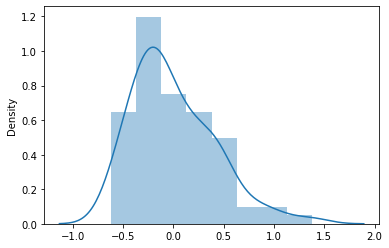

In [35]:
res = y - y_pred
sns.distplot(res)

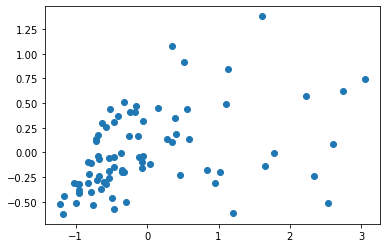

In [36]:
plt.scatter(y, res)

The error residuals are randomly spread data points.

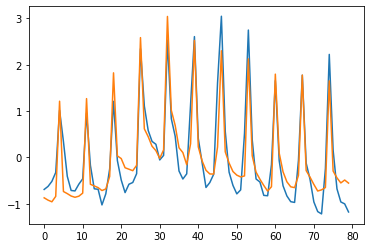

In [37]:
#### Plotting the predictions over time
plt.plot(media["days_diff"], y)
plt.plot(media["days_diff"], y_pred)
plt.show()

### Conclusion: 

From this model, we could interpret that about 83.4 % of the variation in the data.
The variables that are affecting this model are:
- Weekends affect the viewership of the show.
- Ad Impressions. From the EDA, we could confirm that the ad Impressions over the time has reduced.

Also, there is one more model - which tells a different story
- Visitors 
- weekend
- Character A 


From both the points, here are the two areas where we could improve - 
1. Improve the ad Impressions so that the number of the vistors increase.
2. From the Eda, and the model, Character A seemed to be a significant character. Get back character A to the show.